In [22]:
import matplotlib.pyplot as plt
# import the necessary packages
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Dropout,Flatten
from keras.optimizers import SGD
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random
import pickle
import cv2
from PIL import Image
import os

/Users/shashankshivam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  if sys.path[0] == '':


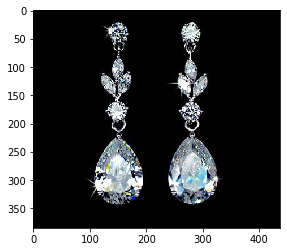

In [24]:
#import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

pil_im=[]
for x in ['/Users/shashankshivam/Desktop/image/earings/earings.223.jpg',
 '/Users/shashankshivam/Desktop/image/necklace/necklace.183.jpg',
 '/Users/shashankshivam/Desktop/image/earings/earings.270.jpg',]:
    pil_im = Image.open(x) 
    im_array = np.asarray(pil_im)
    plt.imshow(im_array)
    plt.show()
#im_array


In [25]:
# initialize the data and labels
data = []
labels = []

In [26]:
# grab the image paths and randomly shuffle them
imagePaths = sorted(list(paths.list_images('/Users/shashankshivam/Desktop/image/')))
random.seed(42)
random.shuffle(imagePaths)

In [27]:
imagePaths[:5]

['/Users/shashankshivam/Desktop/image/earings/earings.223.jpg',
 '/Users/shashankshivam/Desktop/image/necklace/necklace.183.jpg',
 '/Users/shashankshivam/Desktop/image/earings/earings.270.jpg',
 '/Users/shashankshivam/Desktop/image/earings/earings.211.jpg',
 '/Users/shashankshivam/Desktop/image/necklace/necklace.272.jpg']

/Users/shashankshivam/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


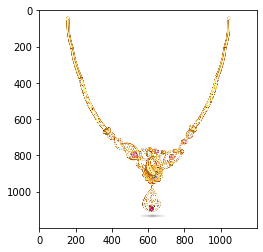

In [30]:
#import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

pil_im=[]
for x in imagePaths[:5]:
    pil_im = Image.open(x) 
    im_array = np.asarray(pil_im)
    plt.imshow(im_array)
plt.show()
#im_array


In [124]:
del(imagePaths[1116])

In [16]:
for imagePath in imagePaths:
    image = cv2.imread(imagePath)
    # flatten the image into 32x32x3=3072
    image = cv2.resize(image, (32, 32)).flatten()
    data.append(image) 
    # getting labels from the path
    label = imagePath.split(os.path.sep)[-2]
    labels.append(label)

In [18]:
data

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([0, 0, 0, ..., 0, 0, 0], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 254, 254, 254], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([205, 201, 200, ..., 223, 224, 222], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([240, 240, 240, ..., 240, 240, 240], dtype=uint8),
 array([ 14,   9,  11, ..., 197, 203, 202], dtype=uint8),
 array([  0,   0,   0, ...,  71,  91, 240], dtype=uint8),
 array([255, 255, 255, ..., 249, 249, 249], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ..., 255, 255, 255], dtype=uint8),
 array([255, 255, 255, ...

In [19]:
# fitting the pixel in the range 0, 1
data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

In [20]:
data.dtype

dtype('float64')

In [21]:
data.shape

(1196, 3072)

In [22]:
data

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.99607843, 0.99215686,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [84]:
(train_X, test_X, train_Y, test_Y) = train_test_split(data,
    labels, test_size=0.25, random_state=42)

In [85]:
lb = LabelBinarizer()
train_Y = lb.fit_transform(train_Y)
test_Y = lb.transform(test_Y)

In [86]:
model = Sequential()
model.add(Dense(1195, input_shape=(3072,), activation="sigmoid"))
#model.add(Dense(64, activation="sigmoid")) #Hidden layer
model.add(Dense(128, activation="sigmoid")) #Hidden layer
model.add(Dense(4, activation="softmax")) 

In [87]:
# initializing initial learning rate 
opt = SGD(lr=0.03)
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])
#model.fit(trainX,trainY,batch_size=9,epochs=50)

In [89]:
# train the neural network
H = model.fit(train_X, train_Y, validation_data=(test_X, test_Y),
    epochs=50, batch_size=9)

Train on 897 samples, validate on 299 samples
Epoch 1/50
897/897 [==============================] - 4s 5ms/step - loss: 1.4495 - acc: 0.2363 - val_loss: 1.4132 - val_acc: 0.3144
Epoch 2/50
897/897 [==============================] - 4s 4ms/step - loss: 1.4090 - acc: 0.2854 - val_loss: 1.3985 - val_acc: 0.2542
Epoch 3/50
897/897 [==============================] - 4s 4ms/step - loss: 1.4020 - acc: 0.2709 - val_loss: 1.3827 - val_acc: 0.2843
Epoch 4/50
897/897 [==============================] - 4s 5ms/step - loss: 1.3854 - acc: 0.3032 - val_loss: 1.3598 - val_acc: 0.3244
Epoch 5/50
897/897 [==============================] - 4s 4ms/step - loss: 1.3721 - acc: 0.3055 - val_loss: 1.4393 - val_acc: 0.3779
Epoch 6/50
897/897 [==============================] - 4s 4ms/step - loss: 1.3510 - acc: 0.3423 - val_loss: 1.3678 - val_acc: 0.2742
Epoch 7/50
897/897 [==============================] - 4s 4ms/step - loss: 1.3455 - acc: 0.3233 - val_loss: 1.3392 - val_acc: 0.3779
Epoch 8/50
897/897 [==========

In [90]:
predictions = model.predict(test_X)

In [91]:
predictions

array([[0.09272821, 0.30411643, 0.5658317 , 0.03732365],
       [0.1026354 , 0.46713778, 0.3892161 , 0.04101075],
       [0.3904682 , 0.31983468, 0.21383692, 0.07586022],
       ...,
       [0.06761233, 0.19932655, 0.7046251 , 0.02843608],
       [0.43184   , 0.22243999, 0.11570618, 0.23001386],
       [0.08514059, 0.44952667, 0.33800194, 0.12733081]], dtype=float32)

In [92]:
predictions = model.predict(test_X, batch_size=32)
print(classification_report(test_Y.argmax(axis=1),
    predictions.argmax(axis=1), target_names=lb.classes_))

              precision    recall  f1-score   support

     bangles       0.55      0.40      0.46        83
     earings       0.60      0.78      0.68        78
    necklace       0.52      0.87      0.65        71
        ring       0.79      0.22      0.35        67

   micro avg       0.57      0.57      0.57       299
   macro avg       0.62      0.57      0.54       299
weighted avg       0.61      0.57      0.54       299



In [68]:
loss, acc = model.evaluate(test_X, test_Y, verbose = 0)
print(acc * 100)

61.872909778735306


In [140]:
y_pred = model.predict_classes(test_X)
y_true = np.asarray([np.argmax(i) for i in test_Y])

from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_true,y_pred)
cm_normalized = cm.astype('float')/cm.sum(axis = 1)[:, np.newaxis]
#sns.set(front_scale =1.5)
#fig ,ax = plt.subplot(figsize = (10,10))
ax = sns.heatmap(cm_normalized , annot=True,linewidths=0, square=False ,cmap="Greens",yticklabels=labels ,
                 xticklabels=labels , vmin=0 , vmax=np.max(cm_normalized),fmt=".2f",annot_kws={"size":20})
ax.set(xlabel="predicted labels" , ylabel = "true label")

[Text(74.44444444444444, 0.5, 'true label'),
 Text(0.5, 47.24444444444444, 'predicted labels')]